In [1]:
### 라이브러리
import pandas as pd
import numpy as np
import os
import json
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [70]:
pip install dlib

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for dlib: filename=dlib-19.24.2-cp39-cp39-win_amd64.whl size=2840052 sha256=82ececcd7a5f29e972839e8fa7bd1e8665b570ee302a015f4de8d362f3e3164c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f7\ae\0e\3478eae12f6aed0e3d4880147ca855ba5d58f2e1098c73ab5f
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


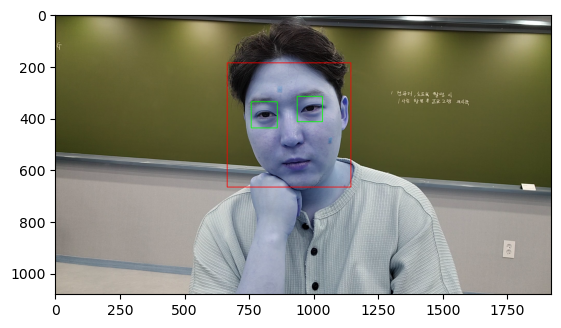

In [2]:
import cv2

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

img = cv2.imread('./data/1model.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3,5)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(0,255,0),2)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

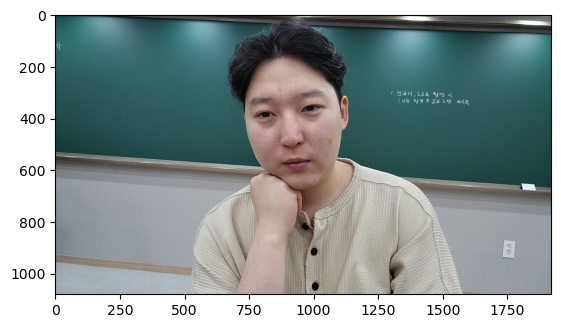

In [5]:
img = cv2.imread('./data/1model.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

In [ ]:
# XML 파일 경로
xml_file_path = '../haarcascades/haarcascade_frontalface_default.xml'

# 파일 존재 여부 확인
if os.path.exists(xml_file_path):
    print("XML 파일이 존재합니다.")
else:
    print("XML 파일이 존재하지 않습니다.")

In [31]:
pd.read_csv("./data/smartphone_label.csv")

,ID,point,condition,r_iris_x,r_iris_y,l_iris_x,l_iris_y,r_eyelid_x,r_eyelid_y,l_eyelid_x,l_eyelid_y,l_center_x,l_center_y,r_center_x,r_center_y
0,1,"[1020, 782]",A,987.5,362.0,816.0,386.5,991.6875,365.2500,818.0625,390.5000,816.0,386.5,987.5,362.0
1,1,"[1020, 782]",A,989.0,363.0,818.0,388.0,993.1875,366.8750,818.9375,392.6875,818.0,388.0,989.0,363.0
2,1,"[1020, 782]",A,989.5,362.5,819.0,388.0,993.0000,366.9375,819.5625,392.4375,819.0,388.0,989.5,362.5
3,1,"[1020, 782]",A,988.5,363.0,817.0,388.0,990.5625,366.3750,819.3750,391.2500,817.0,388.0,988.5,363.0
4,1,"[1020, 782]",A,986.0,362.0,814.5,387.0,990.4375,365.3125,815.3125,390.7500,814.5,387.0,986.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80026,29,"[500, 803]",S,743.0,767.5,465.5,754.5,742.1250,770.9375,464.5000,758.3125,465.5,754.5,743.0,767.5
80027,29,"[500, 803]",S,747.5,767.0,468.5,752.0,743.8750,769.9375,464.0000,755.5625,468.5,752.0,747.5,767.0
80028,29,"[500, 803]",S,746.0,767.0,468.5,753.0,744.6875,769.8750,464.4375,756.4375,468.5,753.0,746.0,767.0
80029,29,"[500, 803]",S,745.5,767.0,467.5,752.5,744.3125,770.1250,464.2500,756.1250,467.5,752.5,745.5,767.0


In [36]:
df[df['ID']==1]

,ID,point,condition,r_iris_x,r_iris_y,l_iris_x,l_iris_y,r_eyelid_x,r_eyelid_y,l_eyelid_x,l_eyelid_y,l_center_x,l_center_y,r_center_x,r_center_y
0,1,"[1020, 782]",A,987.5,362.0,816.0,386.5,991.6875,365.2500,818.0625,390.5000,816.0,386.5,987.5,362.0
1,1,"[1020, 782]",A,989.0,363.0,818.0,388.0,993.1875,366.8750,818.9375,392.6875,818.0,388.0,989.0,363.0
2,1,"[1020, 782]",A,989.5,362.5,819.0,388.0,993.0000,366.9375,819.5625,392.4375,819.0,388.0,989.5,362.5
3,1,"[1020, 782]",A,988.5,363.0,817.0,388.0,990.5625,366.3750,819.3750,391.2500,817.0,388.0,988.5,363.0
4,1,"[1020, 782]",A,986.0,362.0,814.5,387.0,990.4375,365.3125,815.3125,390.7500,814.5,387.0,986.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,1,"[923, 499]",S,652.0,767.5,382.5,761.0,652.1250,765.6875,384.4375,757.0000,383.0,761.0,654.0,769.0
3064,1,"[923, 499]",S,654.0,768.5,389.0,757.5,655.5625,765.3750,380.9375,755.0000,389.0,757.5,654.0,768.5
3065,1,"[923, 499]",S,651.5,769.0,383.0,759.5,653.5000,764.3750,378.9375,754.1250,389.0,753.5,658.0,767.0
3066,1,"[923, 499]",S,655.5,768.5,390.5,755.0,650.1875,765.0625,382.7500,755.0625,390.5,755.0,655.5,768.5


In [26]:
import cv2
import numpy as np
import json

# JSON 파일에서 정보를 불러오기
with open('./data/data.json', 'r') as f:
    data = json.load(f)
annotations = data['Annotations']['annotations']

img = cv2.imread('./data/1model.png')

condition = data['Annotations']['condition']
inst = data['Annotations']['inst']
posture = data['Annotations']['posture']

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2
text_color = (0, 0, 255)

cv2.putText(img, f"Condition: {condition}", (10, 30), font, font_scale, text_color, font_thickness)
cv2.putText(img, f"Inst: {inst}", (10, 60), font, font_scale, text_color, font_thickness)
cv2.putText(img, f"Posture: {posture}", (10, 90), font, font_scale, text_color, font_thickness)

# 주어진 JSON 어노테이션을 화면에 표시
for annotation in annotations:
    points = annotation['points']

    if annotation['shape'] == 'Ellipse':
        rx = int(annotation['rx'])
        ry = int(annotation['ry'])
        cx, cy = int(annotation['cx']), int(annotation['cy'])
        thick = 2
        color = (0, 255, 0)
        cv2.ellipse(img, (cx, cy), (rx, ry), 0, 0, 360, color, thick)

    elif annotation['shape'] == 'Polygon':
        contours = np.array(points, np.int32)
        contours = contours.reshape(-1, 1, 2)
        color = (0, 0, 255)
        cv2.polylines(img, [contours], isClosed=True, color=color, thickness=2)

    elif annotation['shape'] == 'Point':
        x, y = int(points[0][0]), int(points[0][1])
        radius = 3
        color = (255, 0, 0)
        cv2.circle(img, (x, y), radius, color, -1)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
data['Annotations']

{'name': 'NIA22EYE_S1_001_T1_S10_S_rgb_A_C_L_001.png',
 'inst': 'S',
 'image': 'rgb',
 'condition': 'A',
 'posture': 'C',
 'metaid': '001',
 'annotations': [{'label': 'r_iris',
   'points': [[971, 348], [1004, 376]],
   'shape': 'Ellipse',
   'rotate': 0,
   'rx': 16.5,
   'ry': 14,
   'cx': 987.5,
   'cy': 362},
  {'label': 'l_iris',
   'points': [[801, 372], [831, 401]],
   'shape': 'Ellipse',
   'rotate': 0,
   'rx': 15,
   'ry': 14.5,
   'cx': 816,
   'cy': 386.5},
  {'label': 'r_eyelid',
   'points': [[955, 377],
    [960, 377],
    [969, 376],
    [981, 376],
    [994, 374],
    [1006, 370],
    [1015, 366],
    [1020, 362],
    [1025, 357],
    [1021, 356],
    [1015, 355],
    [1007, 353],
    [993, 354],
    [980, 357],
    [967, 363],
    [959, 371]],
   'shape': 'Polygon'},
  {'label': 'l_eyelid',
   'points': [[786, 393],
    [792, 397],
    [799, 399],
    [807, 400],
    [819, 399],
    [831, 397],
    [843, 394],
    [851, 392],
    [854, 391],
    [849, 387],
    [839, 

In [48]:
import cv2
import dlib
import numpy as np

def detect_eyes(gray_img, face_landmarks):
    eye_regions = []

    for side in ['left', 'right']:
        if side == 'left':
            p1, p2, p3, p4, p5, p6 = list(range(36, 42))
        else:
            p1, p2, p3, p4, p5, p6 = list(range(42, 48))

        pt1, pt2, pt3, pt4, pt5, pt6 = [face_landmarks.part(p1).x, face_landmarks.part(p1).y], [face_landmarks.part(p2).x, face_landmarks.part(p2).y], [face_landmarks.part(p3).x, face_landmarks.part(p3).y], [face_landmarks.part(p4).x, face_landmarks.part(p4).y], [face_landmarks.part(p5).x, face_landmarks.part(p5).y], [face_landmarks.part(p6).x, face_landmarks.part(p6).y]

        eye_region = np.array([pt1, pt2, pt3, pt4, pt5, pt6], np.int32)
        eye_regions.append(eye_region)

    return eye_regions

def detect_iris(eye_image):
    gray_img = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray_img, 5)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=30, param2=15, minRadius=7, maxRadius=21)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(eye_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("./data/shape_predictor_68_face_landmarks.dat")

img = cv2.imread("./data/img.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_detector(gray_img)

for face in faces:
    landmarks = landmark_predictor(gray_img, face)
    eye_regions = detect_eyes(gray_img, landmarks)

    for points in eye_regions:
        eye_image = img[points[1][1]:points[5][1], points[0][0]:points[3][0]]
        detect_iris(eye_image)
        for point in points:
            x,y=point
            print(f"좌표: ({x}, {y})")
        points = points.reshape((-1, 1, 2))
        cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=2)

cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

좌표: (370, 154)
좌표: (383, 147)
좌표: (397, 149)
좌표: (409, 159)
좌표: (396, 160)
좌표: (381, 158)
좌표: (470, 165)
좌표: (483, 158)
좌표: (496, 159)
좌표: (506, 168)
좌표: (495, 170)
좌표: (482, 168)


In [17]:
import cv2
import dlib
import numpy as np

def detect_eyes(gray_img, face_landmarks):
    eye_regions = []

    for side in ['left', 'right']:
        if side == 'left':
            p1, p2, p3, p4, p5, p6 = list(range(36, 42))
        else:
            p1, p2, p3, p4, p5, p6 = list(range(42, 48))

        pt1, pt2, pt3, pt4, pt5, pt6 = [face_landmarks.part(p1).x, face_landmarks.part(p1).y], [face_landmarks.part(p2).x, face_landmarks.part(p2).y], [face_landmarks.part(p3).x, face_landmarks.part(p3).y], [face_landmarks.part(p4).x, face_landmarks.part(p4).y], [face_landmarks.part(p5).x, face_landmarks.part(p5).y], [face_landmarks.part(p6).x, face_landmarks.part(p6).y]

        eye_region = np.array([pt1, pt2, pt3, pt4, pt5, pt6], np.int32)
        eye_regions.append(eye_region)

    return eye_regions

def detect_pupil(img, eye_points):
    eye_img = img[eye_points[1][1]:eye_points[5][1], eye_points[0][0]:eye_points[3][0]]
    gray_eye = cv2.cvtColor(eye_img, cv2.COLOR_BGR2GRAY)
    blurred_eye = cv2.GaussianBlur(gray_eye, (7, 7), 0)

    circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=3, maxRadius=8)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            x += eye_points[0][0]
            y += eye_points[1][1]
            cv2.circle(eye_img, (x - eye_points[0][0], y - eye_points[1][1]), r, (0, 255, 0), 2)
            # 눈동자의 중심 좌표에 원 그리기
            cv2.circle(eye_img, (x - eye_points[0][0], y - eye_points[1][1]), 2, (0, 255, 0), -1)

    # 눈동자 표시된 이미지를 원래 이미지에 적용
    img[eye_points[1][1]:eye_points[5][1], eye_points[0][0]:eye_points[3][0]] = eye_img

face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("./data/shape_predictor_68_face_landmarks.dat")

img = cv2.imread("./data/img.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_detector(gray_img)

for face in faces:
    landmarks = landmark_predictor(gray_img, face)
    eye_regions = detect_eyes(gray_img, landmarks)

    for eye_points in eye_regions:
        detect_pupil(img, eye_points)
        points = eye_points.reshape((-1, 1, 2))
        cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=2)

cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:
import numpy as np
import dlib
import cv2

# EYES = list(range(36,48))
EYES = list(range(36, 42)) + list(range(42, 48))
frame_width = 640
frame_height = 480

raw_image = cv2.imread('./data/1model.png') #-- 이미지 경로

face_cascade_name = './data/haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier()
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)

predictor_file = './data/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_file)

image = cv2.resize(raw_image, (frame_width, frame_height))
faces = face_cascade.detectMultiScale(image)

#- detect face area
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    rect = dlib.rectangle(int(x), int(y), int(x+w), int(y+h))
        
    #- detect eye area
    points = np.matrix([[p.x, p.y] for p in predictor(image, rect).parts()])
    show_parts = points[EYES]

    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)

cv2.imshow('Face & Eye Area Detection', image)
#cv2.imwrite('output.png',image) #- image output 저장용
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
import numpy as np
import dlib
import cv2

EYES = list(range(36,48))

frame_width = 640
frame_height = 480

face_cascade_name = './data/haarcascade_frontalface_alt.xml' #-- 본인 환경에 맞게 변경할 것
face_cascade = cv2.CascadeClassifier()
vedio_path = './vedio.mp4' #-- 본인 환경에 맞게 변경할 것


if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)

predictor_file = './data/shape_predictor_68_face_landmarks.dat' #-- 본인 환경에 맞게 변경할 것
predictor = dlib.shape_predictor(predictor_file)

cap = cv2.VideoCapture(0) #-- 캠 사용 시 vedio_path 대신 0 사용    

if not cap.isOpened:
    print('Could not open video')
    exit(0)

"""
#- vedio output 저장용
w = round(frame_width) # round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(frame_height) # round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 20 # cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output_sample.mp4', fourcc, fps, (w, h))

"""

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print('Could not read frame')
        exit()

    image = cv2.resize(frame, (frame_width, frame_height))
    faces = face_cascade.detectMultiScale(image)
    
    #- detect face area
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        rect = dlib.rectangle(int(x), int(y), int(x+w), int(y+h))
        
        #- detect eye area
        points = np.matrix([[p.x, p.y] for p in predictor(image, rect).parts()])
        show_parts = points[EYES]

        for (i, point) in enumerate(show_parts):
            x = point[0,0]
            y = point[0,1]
            cv2.circle(image, (x, y), 1, (0, 255, 255), -1)

    #out.write(image) #- vedio output 저장용
    cv2.imshow('Face & Eye Area Detection', image)
    
    # q 입력시 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [27]:
import json
import cv2
import dlib
import numpy as np

# 이미지 경로
image_path = './data/img.jpg'

# Load face detector and shape predictor
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('./data/shape_predictor_68_face_landmarks.dat')

# Load image
raw_image = cv2.imread(image_path)
gray_img = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_detector(gray_img)

# Create a list to store eye regions
eye_regions_list = []

for face in faces:
    landmarks = landmark_predictor(gray_img, face)
    
    # Detect eye regions
    eye_regions = []
    for i in range(36, 48):  # Facial landmark indices for eyes
        x, y = landmarks.part(i).x, landmarks.part(i).y
        eye_regions.append([x, y])
    
    eye_regions_list.append(eye_regions)

# Create JSON data
data = {
    "id": {"subject": 1, "medical": "OB0001"},
    "eye_regions": eye_regions_list,
    # ... Other data fields ...
}

# Save JSON to a file
json_path = './data/output.json'
with open(json_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print(f"JSON data saved to {json_path}")


JSON data saved to ./data/output.json


In [36]:
from l2cs.model import L2CS

In [47]:
import cv2
from l2cs.model import L2CS
from l2cs.utils import draw_gaze

# Load pre-trained L2CSNet model
model = L2CS.load_model("./data/data.json")

# Load image
image = cv2.imread("./data/1model.png")

# Perform eye tracking using L2CSNet
eye_coordinates = model.predict(image)

# Draw eye coordinates on the image
image_with_eyes = draw_eyes(image, eye_coordinates)

# Display the image with eye tracking
cv2.imshow("Eye Tracking", image_with_eyes)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: type object 'L2CS' has no attribute 'load_model'